<a href="https://colab.research.google.com/github/nescoba/portafolio/blob/main/02081910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression of Finantial Data

## Data Wrangling 

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set(rc = {'figure.figsize':(12,12)})


In [2]:
dfs = []
for year in range(2014, 2019):
  dfs.append(pd.read_csv(f'{year}_Financial_Data.csv'))
  dfs[year - 2014]['Year'] = year
  dfs[year - 2014]['Price Var'] = dfs[year - 2014][f'{year+1} PRICE VAR [%]']
  dfs[year - 2014].drop(f'{year+1} PRICE VAR [%]', axis=1, inplace=True)

df = dfs[0]
for year in range(2015, 2019):
  df = pd.merge(df, dfs[year - 2014], how='outer')

df.shape

(22077, 226)

In [3]:
df['Symbol'] = df['Unnamed: 0']
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Year,Price Var,Symbol
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,0.000000e+00,...,0.1664,-1.4220,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,NaN,0.0699,-0.0615,-0.0695,0.0323,0.0088,-0.0182,0.0355,0.0015,0.0260,0.0603,-0.0137,0.0060,0.1442,0.0353,0.0201,0.1013,0.0834,0.0751,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0,2014,-9.323276,PG
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,NaN,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,6.299354e+07,...,0.3294,-17.8582,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.0195,0.0000,0.2134,-0.3626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,0,2014,-25.512193,VIPS
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,0.000000e+00,...,0.2821,-2.2665,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.0317,0.2429,0.2095,0.3935,0.1027,0.1038,0.1399,0.0889,0.0937,0.0946,0.2272,0.0906,0.1892,0.0676,0.0558,0.0789,0.0000,0.1215,0.1633,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1,2014,33.118297,KR
3,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,

In [4]:
from sklearn.impute import SimpleImputer

non_num_attribs = ['Sector', 'Class', 'Symbol']
num_attribs = list(df.columns)
for attrib in non_num_attribs:
    num_attribs.remove(attrib)

df_num = df[num_attribs]

imputer = SimpleImputer()
X = imputer.fit_transform(df_num)

imp_df = pd.DataFrame(X, columns=df_num.columns)
imp_df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Year,Price Var
0,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,1.420000e+08,-1.127000e+09,1.164300e+10,0.0,1.164300e+10,4.1900,4.010,2.705960e+09,2.705960e+09,2.448,0.4754,0.2470,0.2043,0.1560,0.1359,1.834400e+10,1.520300e+10,1.178500e+10,0.1948,0.1565,8.558000e+09,2.128000e+09,1.068600e+10,6.386000e+09,6.759000e+09,3.161700e+10,2.230400e+10,8.454700e+10,0.000000e+00,...,11.540400,1.564800,10.886900,0.1664,-1.4220,-0.1185,-0.0001,0.0067,0.0293,0.0371,0.0389,-0.0127,189.61097,0.0699,-0.0615,-0.0695,0.032300,0.008800,-0.018200,0.035500,0.00150,0.026000,0.060300,-0.013700,0.006000,0.144200,0.035300,0.020100,0.10130,0.083400,0.075100,-0.018700,-0.021700,0.035900,0.031600,0.122800,0.0000,-0.1746,2014.0,-9.323276
1,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,-1.431918e+07,0.000000e+00,1.358227e+08,0.0,1.358227e+08,0.2396,0.226,2.631767e+08,1.829362e+07,0.000,0.2487,0.0107,0.0502,0.0058,0.0704,2.456858e+08,1.875310e+08,1.215036e+08,0.0470,0.0364,7.735149e+08,6.083852e+08,1.381900e+09,1.169487e+07,5.793193e+08,2.134397e+09,3.085975e+08,1.906587e+08,6.299354e+07,...,44.772268,6.213959,31.624186,0.3294,-17.8582,1.2489,1.6142,1.9463,1.5649,1.4625,1.4646,0.0184,0.01950,0.0000,0.2134,-0.3626,0.021051,0.028228,0.040704,0.037766,0.04725,0.064219,0.030847,0.056921,0.072423,0.033468,0.039182,0.047642,-0.02619,-0.000596,0.012298,10.978239,0.158858,1.134221,0.783208,3.733922,1.6484,1.7313,2014.0,-25.512193
2,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,1.200000e+07,0.000000e+00,1.519000e+09,0.0,1.519000e+09,1.4700,1.450,1.033053e+09,1.028000e+09,0.307,0.2057,0.0450,0.0276,0.0150,0.0126,4.416000e+09,2.713000e+09,1.531000e+09,0.0231,0.0154,4.010000e+08,0.000000e+00,4.010000e+08,1.116000e+09,5.651000e+09,8.830000e+09,1.689300e+10,2.837000e+09,0.000000e+00,...,90.793700,4.959300,18.222700,0.2821,-2.2665,0.0173,-0.0145,-0.0141,0.0147,0.0576,0.0469,-0.0356,-0.03170,0.2429,0.2095,0.3935,0.102700,0.103800,0.139900,0.088900,0.09370,0.094600,0.227200,0.090600,0.189200,0.06

In [7]:
from sklearn.preprocessing import StandardScaler

no_standard = ['Price Var']

standard_attribs = num_attribs.copy()
for column in no_standard:
    standard_attribs.remove(column)

stand_imp_df = StandardScaler().fit_transform(imp_df[standard_attribs])

stand_imp_df = pd.DataFrame(stand_imp_df, columns=standard_attribs)

stand_imp_df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Year
0,2.225424,-0.012416,1.443993,3.932535,-0.141655,5.629717,3.693319,4.591282,1.273897,5.818641,0.354750,0.944295,-4.891230,4.416460,-0.092577,4.414880,0.012265,0.012363,1.236439,1.195360,0.018019,-0.013533,0.040397,0.035645,0.041262,0.033151,4.065696,4.536054,4.427324,0.035416,0.035481,0.314642,0.039924,0.244439,0.569522,0.724585,0.595556,1.152882,9.786189,-0.089491,...,0.009602,-0.020758,-0.066262,-3.028714e-02,-0.015160,0.030074,-0.008402,-0.003663,-0.002532,0.009610,-0.006873,-0.007473,-0.008784,-1.249945e-18,-0.026759,-0.012863,0.006110,9.549505e-02,-0.097800,-0.129826,-2.600753e-02,-2.742452e-01,-1.351490e-01,0.351964,-4.103998e-01,-0.198102,1.167669e+00,-0.022745,-0.080175,7.265740e-01,4.252167e-01,2.624649e-01,-0.010506,-0.058562,-2.562788e-02,-1.211147e-02,-2.199518e-02,-0.024183,-0.038061,-1.521459
1,-0.045880,-0.008231,-0.018284,-0.122675,0.006850,-0.143753,-0.105648,-0.156866,-0.178494,-0.131786,-0.011791,-0.203450,0.014104,-0.099224,-0.092577,-0.098568,0.012261,0.012358,0.000000,-0.121620,-0.017767,-0.260068,0.039351,0.034909,0.040607,0.032813,-0.159522,-0.133300,-0.108974,0.034709,0.034908,-0.052943,-0.042064,-0.054926,-0.101529,0.008725,-0.073723,-0.141568,-0.182040,-0.087568,...,0.009257,0.000000,0.000000,-5.188796e-18,-0.015159,0.030047,-0.007800,0.003657,0.008254,0.016140,0.032906,-0.007468,-0.008763,-8.337957e-03,-0.047936,-0.012808,0.005595,2.945184e-17,0.000000,0.000000,7.965482e-17,-4.159432e-17,4.907386e-17,0.000000,4.032382e-17,0.000000,-7.317080e-17,0.000000,0.000000,-1.977267e-17,3.293173e-18,7.249826e-18,0.000000,0.000000,-5.181119e-18,-1.789022e-18,-2.704927e-18,0.110669,0.096335,-1.521459
2,2.995973,-0.012115,3.022673,2.150678,-0.141655,3.916830,2.967424,0.736002,0.719495,0.738680,0.080962,-0.010206,0.014104,0.443567,-0.092577,0.443954,0.012262,0.012360,0.389680,0.373145,-0.013279,-0.306831,0.039503,0.034802,0.040647,0.032515,0.814076,0.652044,0.439224,0.034595,0.034808,-0.070533,-0.074889,-0.086487,0.014726,0.596234,0.078273,0.834440,0.130673,-0.089491,...,0.010645,0.028746,-0.017882,-1.957309e-02,-0.015159,0.030072,-0.008342,-0.003728,-0.002648,0.009548,-0.006301,-0.007473,-0.008799,-8.340208e-03,0.025655,-0.012809,0.006924,6.931147e-01,0.380425,0.218630,5.

In [10]:
from sklearn.preprocessing import OneHotEncoder

categories = OneHotEncoder(sparse=False).fit_transform(df['Sector'].to_numpy().reshape(-1,1))

categories = pd.DataFrame(categories, columns=[f'sector_{i}' for i in range(categories.shape[1])])

categories.head()

,sector_0,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9,sector_10
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X = pd.concat([stand_imp_df, categories], axis=1)
X.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,...,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Operating CF Growth (per Share),3Y Operating CF Growth (per Share),10Y Net Income Growth (per Share),5Y Net Income Growth (per Share),3Y Net Income Growth (per Share),10Y Shareholders Equity Growth (per Share),5Y Shareholders Equity Growth (per Share),3Y Shareholders Equity Growth (per Share),10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Year,sector_0,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9,sector_10
0,2.225424,-0.012416,1.443993,3.932535,-0.141655,5.629717,3.693319,4.591282,1.273897,5.818641,0.354750,0.944295,-4.891230,4.416460,-0.092577,4.414880,0.012265,0.012363,1.236439,1.195360,0.018019,-0.013533,0.040397,0.035645,0.041262,0.033151,4.065696,4.536054,4.427324,0.035416,0.035481,0.314642,0.039924,0.244439,0.569522,0.724585,0.595556,1.152882,9.786189,-0.089491,...,-0.007473,-0.008784,-1.249945e-18,-0.026759,-0.012863,0.006110,9.549505e-02,-0.097800,-0.129826,-2.600753e-02,-2.742452e-01,-1.351490e-01,0.351964,-4.103998e-01,-0.198102,1.167669e+00,-0.022745,-0.080175,7.265740e-01,4.252167e-01,2.624649e-01,-0.010506,-0.058562,-2.562788e-02,-1.211147e-02,-2.199518e-02,-0.024183,-0.038061,-1.521459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.045880,-0.008231,-0.018284,-0.122675,0.006850,-0.143753,-0.105648,-0.156866,-0.178494,-0.131786,-0.011791,-0.203450,0.014104,-0.099224,-0.092577,-0.098568,0.012261,0.012358,0.000000,-0.121620,-0.017767,-0.260068,0.039351,0.034909,0.040607,0.032813,-0.159522,-0.133300,-0.108974,0.034709,0.034908,-0.052943,-0.042064,-0.054926,-0.101529,0.008725,-0.073723,-0.141568,-0.182040,-0.087568,...,-0.007468,-0.008763,-8.337957e-03,-0.047936,-0.012808,0.005595,2.945184e-17,0.000000,0.000000,7.965482e-17,-4.159432e-17,4.907386e-17,0.000000,4.032382e-17,0.000000,-7.317080e-17,0.000000,0.000000,-1.977267e-17,3.293173e-18,7.249826e-18,0.000000,0.000000,-5.181119e-18,-1.789022e-18,-2.704927e-18,0.110669,0.096335,-1.521459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.995973,-0.012115,3.022673,2.150678,-0.141655,3.916830,2.967424,0.736002,0.719495,0.738680,0.080962,-0.010206,0.014104,0.443567,-0.092577,0.443954,0.012262,0.012360,0.389680,0.373145,-0.013279,-0.306831,0.039503,0.034802,0.040647,0.032515,0.814076,0.652044,0.439224,0.034595,0.034808,-0.070533,-0.074889,-0.086487,0.014726,0.596234,0.078273,0.834440,0.130673,-0.089491,...,-0.007473,-0.008799,-8.340208e-03,0.025655,-0.012809,0.006924,6.931147e-01,0.380425,0.218630,5.869962e-01,2.784361e-01,1.074305e-01,2.346456,1.957162e-01,0.348279,3.599206e-01,0.097367,0.090991,1.492567e-01,6.180926e-01,6.310739e-01,-0.010429,-0.019706,-2.206482e-02,-7.354598e-03,-2.107544e-02,-0.024183,-0.024099,-1.521459,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.654545,-0.012158,0.603252,0.630288,-0.141655,1.556

In [12]:
y = df['Price Var']
y.head()

0    -9.323276
1   -25.512193
2    33.118297
3     2.752291
4    12.897715
Name: Price Var, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [35]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

## Model Training 

### Linear Regression

In [36]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              Price Var   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9866
Date:                Wed, 09 Feb 2022   Prob (F-statistic):              0.543
Time:                        01:31:38   Log-Likelihood:            -1.5371e+05
No. Observations:               14128   AIC:                         3.079e+05
Df Residuals:                   13906   BIC:                         3.095e+05
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [37]:
np.sqrt(results.mse_total)

12951.555463864534

In [38]:
results.predict()

array([ 492.86472437,  -25.34933606,   54.09256925, ..., 1481.04592886,
       -147.33847693,  455.96753414])

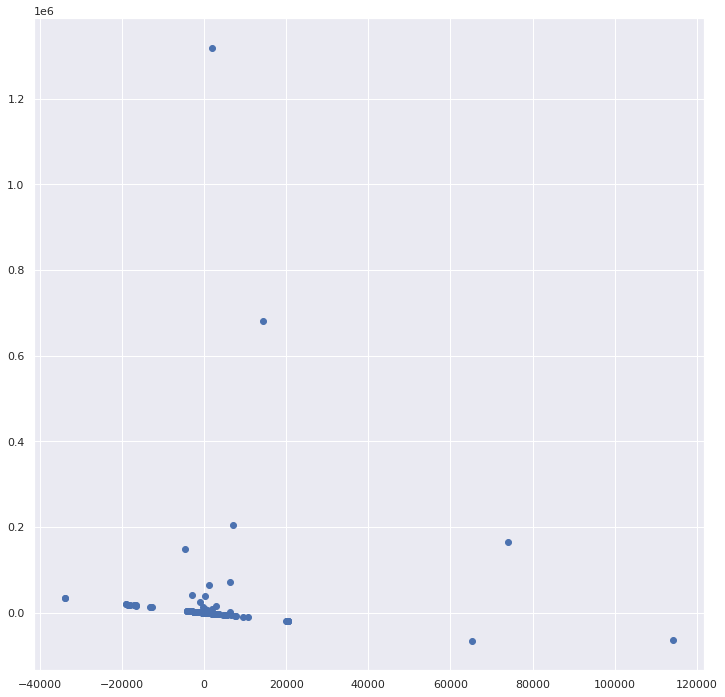

In [39]:
plt.scatter(results.predict(), results.resid)

{'boxes': [<matplotlib.lines.Line2D at 0x7f404f11c290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f404f123290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f404f12b2d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f404f123d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f404f11c7d0>,
  <matplotlib.lines.Line2D at 0x7f404f11cd10>]}

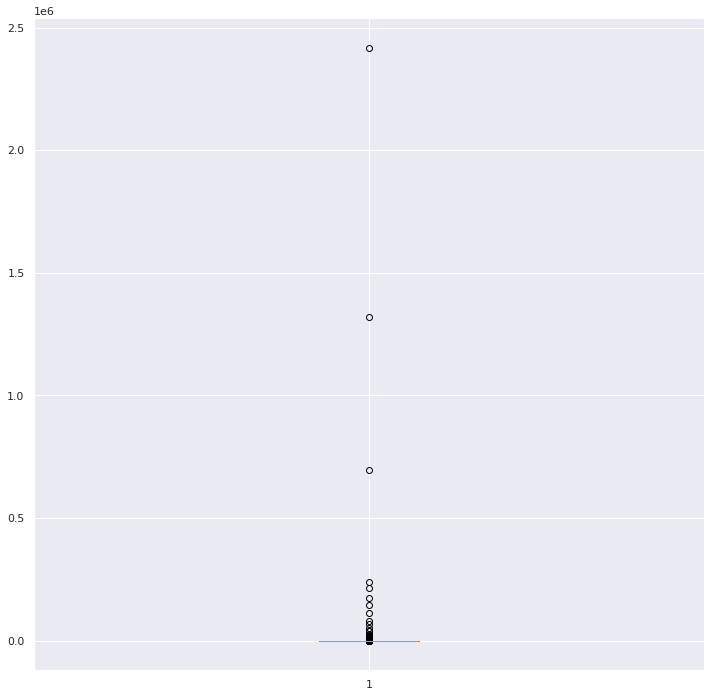

In [40]:
plt.boxplot(y)

{'boxes': [<matplotlib.lines.Line2D at 0x7f404c793f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f404c7a0050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f404c727090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f404c7a0b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f404c799590>,
  <matplotlib.lines.Line2D at 0x7f404c799ad0>]}

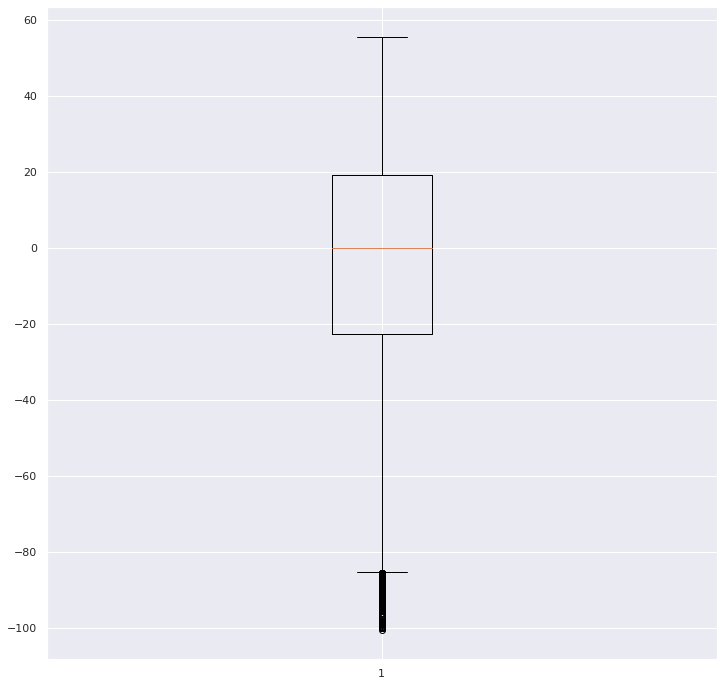

In [62]:
mask = y_train < np.quantile(y_train, 0.9)
plt.boxplot(y_train[mask])

In [64]:
X_train_restr = X_train.loc[mask, :]

results2 = sm.OLS(y_train[mask], X_train_restr).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price Var   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:13:27   Log-Likelihood:                -76381.
No. Observations:               15894   AIC:                         1.532e+05
Df Residuals:                   15672   BIC:                         1.549e+05
Df Model:                         221                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

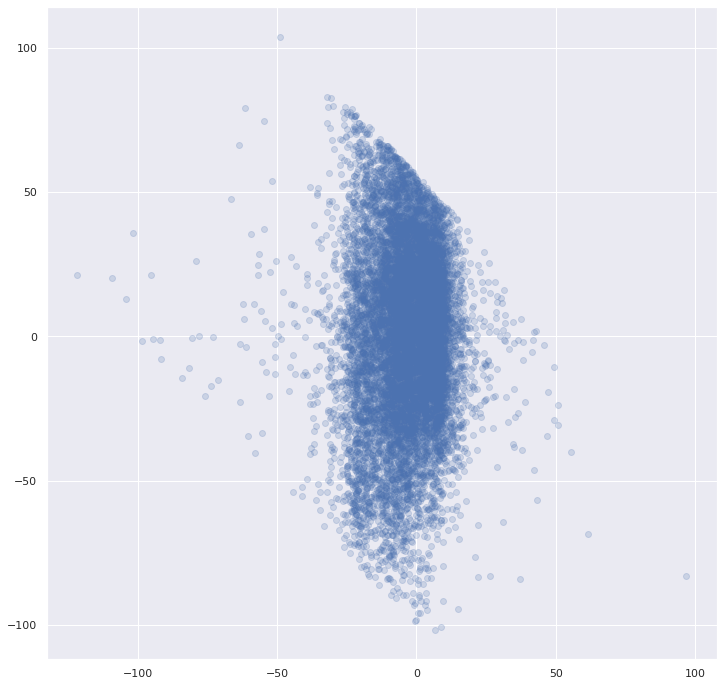

In [43]:
plt.scatter(results2.predict(), results2.resid, alpha=0.2)

In [44]:
np.sqrt(results2.mse_total)

31.744927357597415

### Lasso and Ridge

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.ylim(0,1)

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

def eval_reg(reg):
    y_train_pred = cross_val_predict(reg, X_train, y_train, cv=10)
    print("rmse: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    #plot_learning_curves(reg, X_train, y_train)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = [{'alpha':[1, 10, 100, 1000, 10000]}]
ridge_reg = Ridge()

ridge_reg_grid = GridSearchCV(ridge_reg, param_grid, scoring='neg_mean_squared_error')
ridge_reg_grid.fit(X_train, y_train)

best_ridge = ridge_reg_grid.best_estimator_

ridge_reg_grid.best_params_

{'alpha': 100}

In [56]:
from sklearn.linear_model import Lasso

param_grid = [{'alpha':[0.1, 1, 10, 100]}]
lasso_reg = Lasso()

lasso_reg_grid = GridSearchCV(lasso_reg, param_grid, scoring='neg_mean_squared_error')
lasso_reg_grid.fit(X_train, y_train)

best_lasso = lasso_reg_grid.best_estimator_

lasso_reg_grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.859e+11, tolerance: 8.183e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+11, tolerance: 6.450e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 1}

In [57]:
from sklearn.svm import LinearSVR

param_grid = [{'epsilon':[10, 100, 1000, 10000]}]
svr_reg = LinearSVR()

svr_reg_grid = GridSearchCV(svr_reg, param_grid, scoring='neg_mean_squared_error')
svr_reg_grid.fit(X_train, y_train)

best_svr = svr_reg_grid.best_estimator_

svr_reg_grid.best_params_

{'epsilon': 10000}

In [58]:
from sklearn.tree import DecisionTreeRegressor

param_grid = [{'max_depth':[1, 2,3]}]
tree_reg = DecisionTreeRegressor()
tree_reg_grid = GridSearchCV(tree_reg, param_grid, scoring='neg_mean_squared_error')
tree_reg_grid.fit(X_train, y_train)

best_tree = tree_reg_grid.best_estimator_

tree_reg_grid.best_params_

{'max_depth': 2}

In [60]:
regressors = [('ridge', best_ridge), ('lasso', best_lasso), ('svr', best_svr), ('tree', best_tree)]

for regr_name, regr in regressors:
    print(regr_name, "\n")
    eval_reg(regr)

ridge 

rmse:  20100.066571352014
lasso 

rmse:  20063.1671873776
svr 

rmse:  21563.79110950789
tree 

rmse:  21563.47328944793


In [68]:


param_grid = [{'alpha':[1, 10, 100, 1000, 10000]}]
ridge_reg = Ridge()

ridge_reg_grid = GridSearchCV(ridge_reg, param_grid, scoring='neg_mean_squared_error')
ridge_reg_grid.fit(X_train_restr, y_train[mask])

best_ridge = ridge_reg_grid.best_estimator_

print(ridge_reg_grid.best_params_)





param_grid = [{'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}]
lasso_reg = Lasso()

lasso_reg_grid = GridSearchCV(lasso_reg, param_grid, scoring='neg_mean_squared_error')
lasso_reg_grid.fit(X_train_restr, y_train[mask])

best_lasso = lasso_reg_grid.best_estimator_

print(lasso_reg_grid.best_params_)



param_grid = [{'epsilon':[10, 100, 1000, 10000]}]
svr_reg = LinearSVR()

svr_reg_grid = GridSearchCV(svr_reg, param_grid, scoring='neg_mean_squared_error')
svr_reg_grid.fit(X_train_restr, y_train[mask])

best_svr = svr_reg_grid.best_estimator_

print(svr_reg_grid.best_params_)




param_grid = [{'max_depth':[3, 4, 5]}]
tree_reg = DecisionTreeRegressor()
tree_reg_grid = GridSearchCV(tree_reg, param_grid, scoring='neg_mean_squared_error')
tree_reg_grid.fit(X_train_restr, y_train[mask])

best_tree = tree_reg_grid.best_estimator_

print(tree_reg_grid.best_params_)






{'alpha': 1000}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.293e+06, tolerance: 1.281e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.521e+06, tolerance: 1.277e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'epsilon': 100}
{'max_depth': 5}


In [69]:
regressors = [('ridge', best_ridge), ('lasso', best_lasso), ('svr', best_svr), ('tree', best_tree)]

for regr_name, regr in regressors:
    print(regr_name, "\n")
    eval_reg(regr)

ridge 

rmse:  20754.707395122536
lasso 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.275e+11, tolerance: 8.183e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.787e+11, tolerance: 8.231e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

rmse:  35805.194634881605
svr 

rmse:  21566.40667055819
tree 

rmse:  21978.155384393824
